In [96]:
import pandas as pd #for read csv
import numpy as np #for make array
import matplotlib.pyplot  as plt #for draw a diagram
import os
from sklearn.model_selection import train_test_split #for split data set to test and train
from sklearn.neighbors import KNeighborsClassifier #for fit model
# for confusion_matrix
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score #for find score
from sklearn.model_selection import GridSearchCV #for find best k 


In [8]:
data = pd.read_csv("/content/Iris.csv")
#print details
shape = data.shape
print(f"cocolumns : {shape[1]} and rows : {shape[0]}")

cocolumns : 6 and rows : 150


In [10]:
#print this data set
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
#The column id is the row index, not really informative, 
#so we can drop it from the dataset using drop() function

#do it 
data.drop('Id', axis=1, inplace=True)

data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
#Summary Statistics
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
#Class Distribution
#The data set contains 3 classes of 50 instances each. We can check this by

#see it
print(data['Species'].value_counts())
#Iris is a balanced dataset as the data points for each class are evenly distributed. 

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


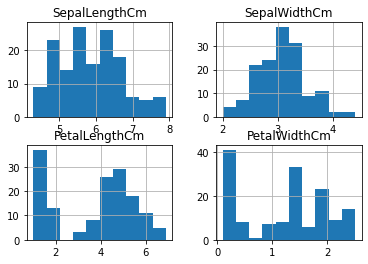

In [23]:
#Univariate Plot
data.hist()
plt.show()
#This gives us a much clearer idea of the distribution of the input variable, 
#showing that both sepal length and 
#sepal width have a normal (Gaussian) distribution. 
#That is, the distribution has a beautiful symmetric bell shape. #
#However, the length of petals is not normal. Its plot shows two modes, 
#one peak happening near 0 and the other around 5. 
#Less patterns were observed for the petal width. 

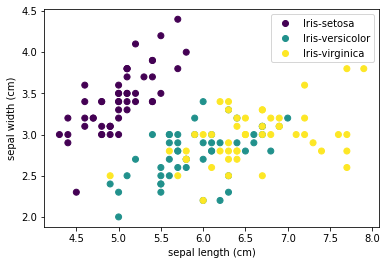

In [27]:
#Multivariate Plot
#To see the interactions between attributes we use scatter plots. 
#However, it's difficult to see if there's any grouping without any indication of the true species of the flower that a datapoint represents.
#Therefore, we define a color code for each species to differentiate species visually:
# build a dict mapping species to an integer code
inv_name_dict = {'Iris-setosa': 0,
'Iris-versicolor': 1,
'Iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in data['Species']]
# scatter plot
scatter = plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c = colors)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
## add legend
plt.legend(handles=scatter.legend_elements()[0],
labels = inv_name_dict.keys())
plt.savefig("plot.png")
plt.show()


#Using sepal_length and sepal_width features, 
#we can distinguish iris-setosa from others;
# separating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints. 

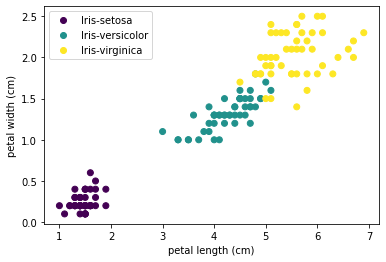

In [29]:
# build a dict mapping species to an integer code
inv_name_dict = {'Iris-setosa': 0,
'Iris-versicolor': 1,
'Iris-virginica': 2}

# build integer color code 0/1/2
colors = [inv_name_dict[item] for item in data['Species']]
# scatter plot
scatter = plt.scatter(data['PetalLengthCm'], data['PetalWidthCm'],c = colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
# add legend
plt.legend(handles= scatter.legend_elements()[0],
labels = inv_name_dict.keys())
plt.savefig("plot.png")
plt.show()
#Interestingly, the length and width of the petal are highly correlated, 
#and these two features are very useful to identify various iris species. 
#It is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, 
#indicating the difficulties for some classifiers. It is worth keeping in mind when training to 
#decide which features we should use. 

In [32]:
#K nearest neighbors
#for read more goes to pdf

In [40]:
#modeling
#Earlier we identified that the length and the width of the petals are the most useful 
#features to separate the species; we then define the features and labels as follows:
X = data[['PetalLengthCm', 'PetalWidthCm']]
Y = data['Species']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [43]:
print(y_train.value_counts())
print("-------------------------------")
print(y_test.value_counts())

Iris-setosa        35
Iris-virginica     35
Iris-versicolor    35
Name: Species, dtype: int64
-------------------------------
Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: Species, dtype: int64


In [47]:
#Now create an instance knn from the class KNeighborsClassifier.
knn = KNeighborsClassifier(n_neighbors=5)
#and now fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
#Label Prediction
pred = knn.predict(X_test)
pred[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [53]:
#Probability Prediction
y_pred_prob = knn.predict_proba(X_test)
#Of all classification algorithms implemented in scikit learn, there is an additional method 'predict_prob'. 
#Instead of splitting the label, it outputs the probability for the target in array form. 
#Let’s take a look at what the predicted probabilities are for the 11th and 12th flowers:
print(y_pred_prob[:5])
#For example, the probability of the 11th flower being predicted an iris-setosa is 1, 
#an iris-versicolor and an iris-virginica are both 0. For the next flower, 
#there is a 20% chance that it would be classified as iris-versicolor 
#but 80% chance to be iris-virginica. What it tells us is that of the five nearest neighbours of the 12th flower in the testing set, 1 is an iris-versicolor, the rest 4 are iris-virginica. To see the corresponding predictions:

[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [60]:
#Model Evaluation part1(Accuracy)


#In classification the most straightforward metric is accuracy. 
#It calculates the proportion of data points whose predicted labels exactly match the observed labels.

print((pred==y_test.values).sum())
print(y_test.size)
#this good
print("--------------------------------")
print((pred==y_test.values).sum() / y_test.size)
print("--------------------------------")
#this same
print(knn.score(X_test, y_test))

44
45
--------------------------------
0.9777777777777777
--------------------------------
0.9777777777777777


In [62]:
#Model Evaluation part1(confusion matrix)

#Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset.
#Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.

#What is a confusion matrix? It is a summary of the counts of correct and incorrect predictions,
#broken down by each class. 

confusion_matrix(y_test, pred)

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


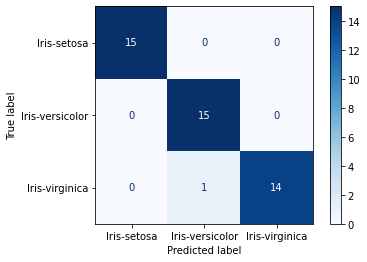

In [64]:
plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues);
plt.savefig("plot.png")


In [ ]:
#K-fold Cross Validation
#Previously we made train-test split before fitting the model so that we can report the model performance on the test data.
#This is a simple kind of cross validation technique, also known as the holdout method. However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation.

#In k fold cross validation, the data is divided into k subsets. 
#Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model. Then the accuracy is averaged over k trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.

#The simplest way to use k-fold cross-validation in scikit-learn is to call the cross_val_score function on the model and the dataset:

In [69]:
# create a new KNN model

knn_cv = KNeighborsClassifier(n_neighbors=3)
# train model with 5-fold cv

cv_scores = cross_val_score(knn_cv, X, Y, cv=5)
for e in cv_scores:
  print(e)

0.9666666666666667
0.9666666666666667
0.9
0.9333333333333333
1.0


In [72]:
#mean of score
cv_scores.mean()
#We can not rely on one single train-test split, rather we report that the 3nn model has
#an accuracy of 95.33% based on a 5-fold cross validation. 

0.9533333333333334

In [75]:
#Grid Search
#When we built our first knn model, we set the hyperparameter k to 5, 
#and then to 3 later in k-fold cross validation; random choices really. 
#What is the best k? Finding the optimal k is called tuning the hyperparameter. 
#A handy tool is grid search. In scikit-learn, we use GridSearchCV, 
#which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score,
#so that we can check which of our values for the tested hyperparameter performed the best.


# create new a knn model
knn2 = KNeighborsClassifier()
# create a dict of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(2, 10)}

# use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [76]:
print(knn_gscv.best_params_)

{'n_neighbors': 4}


In [77]:
print(knn_gscv.best_score_)

0.9666666666666668


In [81]:
#By using grid search to find the optimal hyperparameter for our model, it improves the model accuracy by over 1%.

#Now we are ready to build the final model:

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, Y)

y_pred = knn_final.predict(X)
print(knn_final.score(X, Y))

0.9733333333333334


In [88]:
#Label Prediction with New Data
new_data = np.array([3.76, 1.20]).reshape(1, -1)
print(knn_final.predict(new_data))

['Iris-versicolor']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [93]:
#Probability Prediction with New Data
new_data = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
print(knn_final.predict(new_data))
#and now next cell

['Iris-versicolor' 'Iris-virginica' 'Iris-setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [95]:
print(knn_final.predict_proba(new_data))
#Each row sums to 1. Take the second iris, 
#our model predicts that there is a probability of 25% that the iris would be versicolor, 
#and 75% virginica. This is consistent with the label prediction: virginica. 

[[0.   1.   0.  ]
 [0.   0.25 0.75]
 [1.   0.   0.  ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
